#### Use a dense sequential neural network trained on stock data

In [12]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import base64
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split

%matplotlib inline

In [76]:
import numpy as np
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Dropout

In [14]:
data = pd.read_csv('full_training_data.csv',index_col=[0])
data.head()

,day1_close,day1_sentiment,day1_followers,day2_close,day2_sentiment,day2_followers,day3_close,day3_sentiment,day3_followers,day4_close,day4_sentiment,day4_followers,day5_close,day5_sentiment,day5_followers,day6_delta
0,0.023527,-0.019865,1548.950000,-0.002034,0.174986,6545.855932,-0.008561,0.126985,1411.784946,0.000411,0.198365,1416.228916,-0.008631,0.124655,2960.428571,-0.013267
1,-0.002034,0.174986,6545.855932,-0.008561,0.126985,1411.784946,0.000411,0.198365,1416.228916,-0.008631,0.124655,2960.428571,-0.013267,0.101424,1439.433735,-0.027731
2,-0.008561,0.126985,1411.784946,0.000411,0.198365,1416.228916,-0.008631,0.124655,2960.428571,-0.013267,0.101424,1439.433735,-0.027731,0.071216,3489.701493,0.009075
3,0.000411,0.198365,1416.228916,-0.008631,0.124655,2960.428571,-0.013267,0.101424,1439.433735,-0.027731,0.071216,3489.701493,0.009075,0.062804,5839.215686,0.022484
4,-0.008631,0.124655,2960.428571,-0.013267,0.101424,1439.433735,-0.027731,0.071216,3489.701493,0.009075,0.062804,5839.215686,0.022484,0.048287,2356.814815,-0.007958


In [21]:
#Extract labels
close_delta = data['day6_delta'].values
print(close_delta[0:5])

#convert to binary classification of delta (1 = pos, 0 = neg)
binary_delta = []

for i in close_delta:
    if i >= 0:
        binary_delta.append(1)
    else:
        binary_delta.append(0)
print(binary_delta[0:5])

[-0.01326708 -0.02773107  0.00907524  0.02248392 -0.00795814]
[0, 0, 1, 1, 0]


In [26]:
#Extract training features
features = data.drop(labels=['day6_delta'],axis=1).values
print(features[0:5])

[[ 2.35269836e-02 -1.98650000e-02  1.54895000e+03 -2.03415378e-03
   1.74985593e-01  6.54585593e+03 -8.56098637e-03  1.26984946e-01
   1.41178495e+03  4.11204778e-04  1.98365060e-01  1.41622892e+03
  -8.63127826e-03  1.24654762e-01  2.96042857e+03]
 [-2.03415378e-03  1.74985593e-01  6.54585593e+03 -8.56098637e-03
   1.26984946e-01  1.41178495e+03  4.11204778e-04  1.98365060e-01
   1.41622892e+03 -8.63127826e-03  1.24654762e-01  2.96042857e+03
  -1.32670807e-02  1.01424096e-01  1.43943373e+03]
 [-8.56098637e-03  1.26984946e-01  1.41178495e+03  4.11204778e-04
   1.98365060e-01  1.41622892e+03 -8.63127826e-03  1.24654762e-01
   2.96042857e+03 -1.32670807e-02  1.01424096e-01  1.43943373e+03
  -2.77310726e-02  7.12164179e-02  3.48970149e+03]
 [ 4.11204778e-04  1.98365060e-01  1.41622892e+03 -8.63127826e-03
   1.24654762e-01  2.96042857e+03 -1.32670807e-02  1.01424096e-01
   1.43943373e+03 -2.77310726e-02  7.12164179e-02  3.48970149e+03
   9.07523788e-03  6.28039216e-02  5.83921569e+03]
 [-8

In [27]:
#Ensure lengths are the same
print(len(features))
print(len(binary_delta))

219
219


In [29]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(features, binary_delta, test_size=0.20, random_state=26)

In [31]:
print(len(X_train[0]))

15


In [105]:
model = Sequential()
model.add(Dense(45, input_dim=15, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(45, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))a

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          epochs=60, validation_split=0.15)
score = model.evaluate(X_test, y_test)

Train on 148 samples, validate on 27 samples
Epoch 1/60
148/148 [==============================] - 3s 19ms/step - loss: 8.7160 - acc: 0.4527 - val_loss: 9.5189 - val_acc: 0.4074
Epoch 2/60
148/148 [==============================] - 0s 127us/step - loss: 8.3211 - acc: 0.4730 - val_loss: 9.5124 - val_acc: 0.4074
Epoch 3/60
148/148 [==============================] - 0s 163us/step - loss: 8.2231 - acc: 0.4865 - val_loss: 8.9220 - val_acc: 0.4444
Epoch 4/60
148/148 [==============================] - 0s 154us/step - loss: 8.3517 - acc: 0.4730 - val_loss: 9.7897 - val_acc: 0.3704
Epoch 5/60
148/148 [==============================] - 0s 156us/step - loss: 8.2579 - acc: 0.4865 - val_loss: 9.5189 - val_acc: 0.4074
Epoch 6/60
148/148 [==============================] - 0s 169us/step - loss: 7.7123 - acc: 0.5203 - val_loss: 8.9220 - val_acc: 0.4444
Epoch 7/60
148/148 [==============================] - 0s 173us/step - loss: 8.2507 - acc: 0.4865 - val_loss: 8.3250 - val_acc: 0.4815
Epoch 8/60
148/148

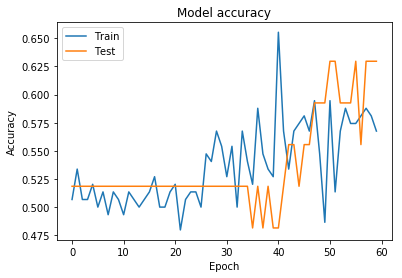

<Figure size 432x288 with 0 Axes>

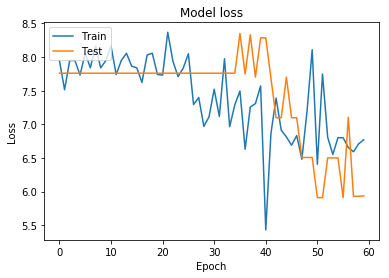

In [101]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
          epochs=60, validation_split=0.15,verbose=0)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
fig1 = plt.gcf()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [107]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_122 (Dense)            (None, 45)                720       
_________________________________________________________________
dropout_80 (Dropout)         (None, 45)                0         
_________________________________________________________________
dense_123 (Dense)            (None, 45)                2070      
_________________________________________________________________
dropout_81 (Dropout)         (None, 45)                0         
_________________________________________________________________
dense_124 (Dense)            (None, 1)                 46        
Total params: 2,836
Trainable params: 2,836
Non-trainable params: 0
_________________________________________________________________
None


In [106]:
weights, biases = model.layers[0].get_weights()
print(weights)
print(biases)

[[-0.00112004 -0.04549582 -0.2905789  -0.21123543 -0.21385813 -0.2585554
  -0.30787876 -0.12470382  0.25849158 -0.10522798  0.2342144  -0.00208049
  -0.14081167  0.13011388  0.15945095  0.10636836  0.21940675  0.20052409
   0.25534174  0.0759954   0.26962456 -0.13795495 -0.27150458 -0.24293004
   0.20235012  0.30216858 -0.08445241 -0.06600146  0.22927524 -0.08990622
   0.24771185 -0.25354472  0.27415887 -0.12377418 -0.24744225 -0.3134795
   0.19752215 -0.31567007  0.13911073  0.17576599  0.07013529  0.30416885
   0.12572834  0.07680776 -0.20159627]
 [ 0.06703226 -0.16017945  0.2292723  -0.01648613 -0.06663062  0.19502988
   0.30107027 -0.16376829  0.17300183  0.24691066  0.17570156  0.16136955
   0.1815603  -0.19148698  0.05073259  0.295309   -0.22920832 -0.17450333
  -0.29712388  0.19020396 -0.09034015  0.11747275  0.2632974  -0.22536455
  -0.12082772  0.05349512 -0.26613328 -0.12649716  0.28883138  0.09900472
   0.09981597  0.20439854  0.25102234  0.29635718  0.32149065  0.19901416
 